# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [24]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

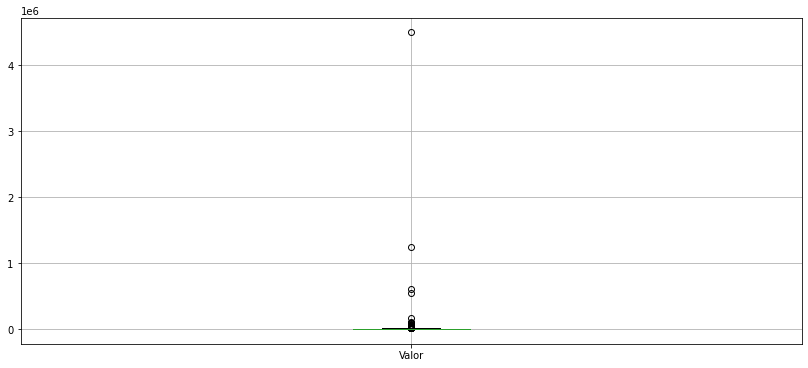

In [25]:
dados.boxplot(['Valor'])

In [26]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7281,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
12077,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
13210,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
14797,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


In [27]:
valor = dados['Valor']

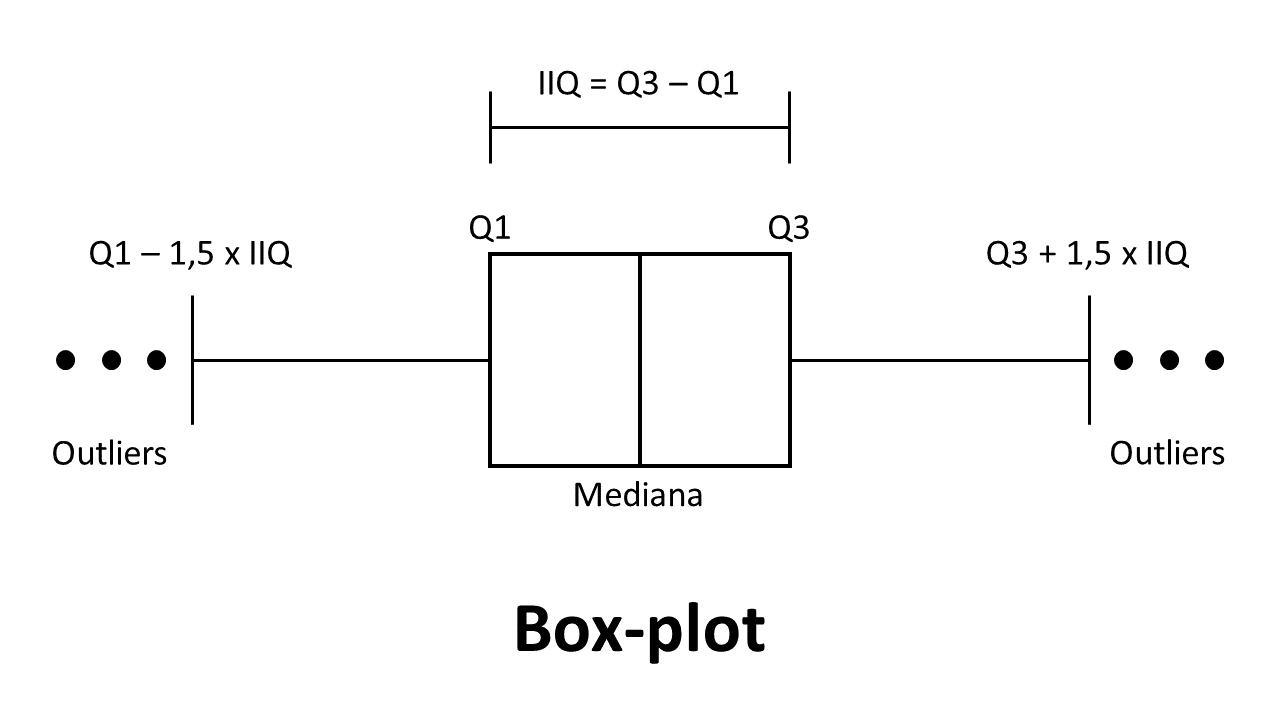

In [28]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [29]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

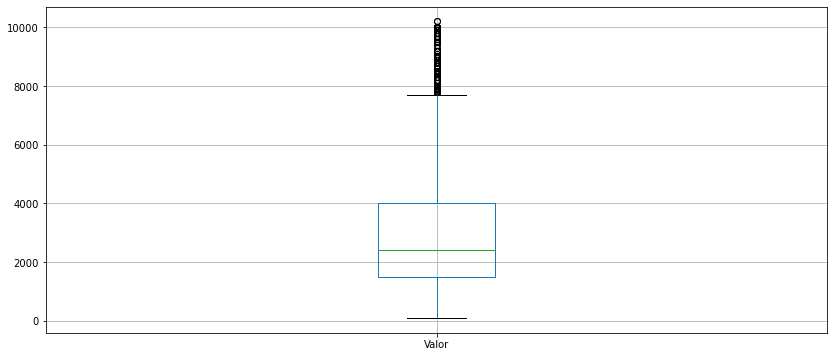

In [30]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

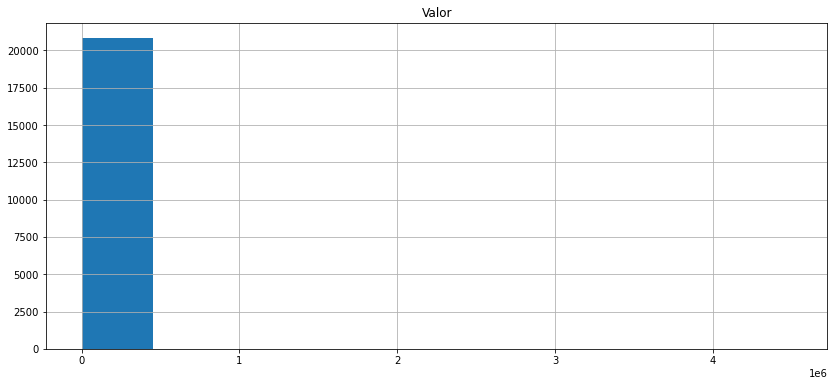

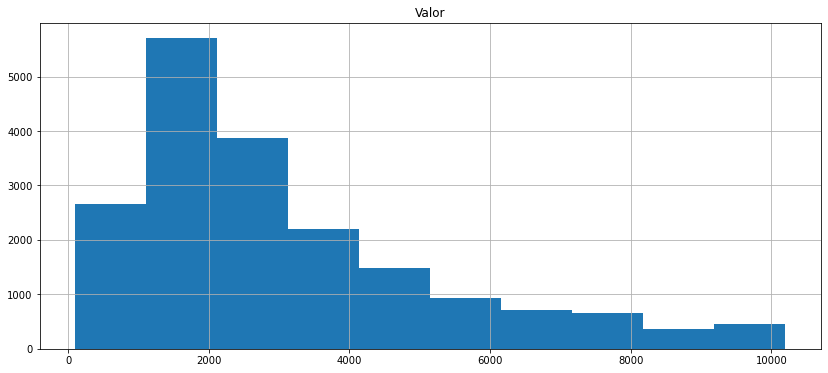

In [31]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (Continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

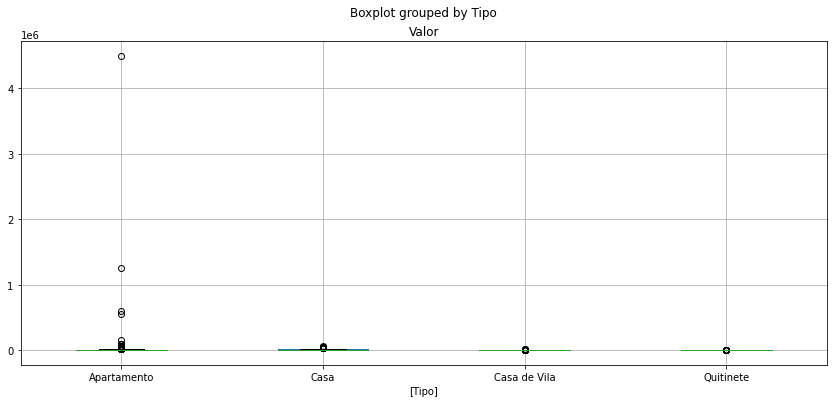

In [32]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [33]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [34]:
grupo_tipo

In [35]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, ...], 'Casa': [1, 18, 49, 52, 90, 94, 138, 154, 172, 227, 238, 241, 251, 271, 293, 299, 317, 321, 339, 360, 367, 380, 404, 414, 451, 452, 458, 487, 518, 519, 542, 546, 547, 592, 595, 603, 608, 609, 632, 646, 670, 690, 692, 728, 739, 748, 821, 837, 898, 940, 982, 989, 1068, 1073, 1075, 1105, 1125, 1190, 1197, 1255, 1273, 1287, 1307, 1347, 1361, 1365, 1373, 1378, 1404, 1407, 1420, 1514, 1531, 1581, 1587, 1591, 1596, 1609, 1634, 1641, 1683, 1728, 1753, 1792, 1819, 1847, 1855, 1873, 1932, 1950, 1967, 1985, 2011, 2017, 2018, 2043, 2078, 2108, 2111, 2118, ...], 'Casa de Vila'

In [36]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [37]:
Q1

Tipo
Apartamento     1700.0
Casa            1100.0
Casa de Vila     750.0
Quitinete        900.0
Name: Valor, dtype: float64

In [38]:
Q3

Tipo
Apartamento     5000.0
Casa            9800.0
Casa de Vila    1800.0
Quitinete       1500.0
Name: Valor, dtype: float64

In [39]:
IIQ

Tipo
Apartamento     3300.0
Casa            8700.0
Casa de Vila    1050.0
Quitinete        600.0
Name: Valor, dtype: float64

In [40]:
limite_inferior

Tipo
Apartamento     -3250.0
Casa           -11950.0
Casa de Vila     -825.0
Quitinete           0.0
Name: Valor, dtype: float64

In [41]:
limite_superior

Tipo
Apartamento      9950.0
Casa            22850.0
Casa de Vila     3375.0
Quitinete        2400.0
Name: Valor, dtype: float64

In [42]:
limite_superior['Apartamento']

9950.0

In [44]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [45]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
20704,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
20739,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0
20759,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0
20820,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

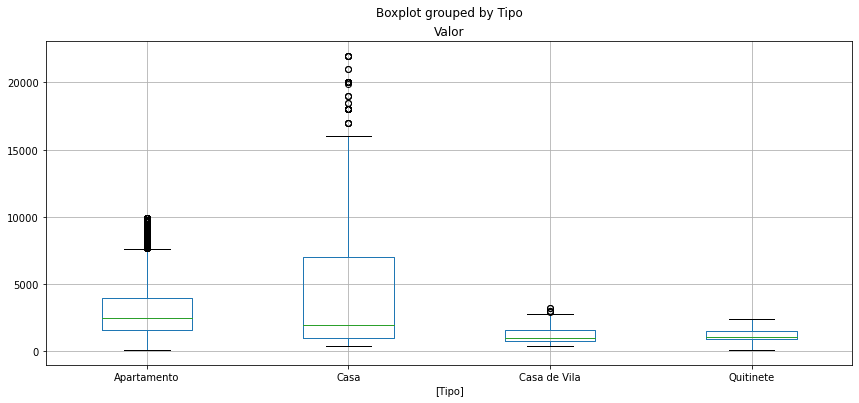

In [46]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [47]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)